# 📚 3.4 相恋篇-Tensorflow2.0 图像处理案例

(375, 500, 3) <dtype: 'uint8'>


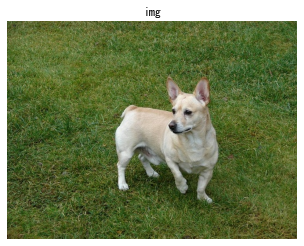

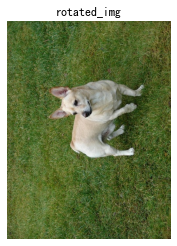

In [2]:
import os
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def show_pic(pic, name, cmap=None):
    '''显示图像'''
    plt.imshow(pic, cmap=cmap)
    plt.axis('off') # 关闭坐标轴
    # 设置图像标题
    plt.title('%s'%(name))
    plt.show()

image_path = 'tf_image/219.jpg'
img = tf.io.read_file(image_path)
# 将图像解码为uint8张量
img = tf.image.decode_jpeg(img)
print(img.shape, img.dtype)
show_pic(img, 'img')

# 将图像逆时针旋转90度
rotated_img = tf.image.rot90(img)
show_pic(rotated_img, 'rotated_img')

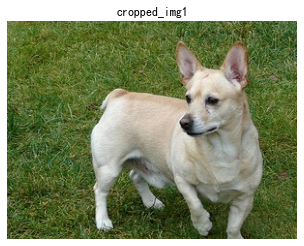

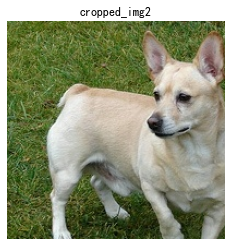

In [3]:
# 中心剪裁，剪裁比例为60%
cropped_img1 = tf.image.central_crop(img, central_fraction=0.6)
show_pic(cropped_img1, 'cropped_img1')

# 剪裁图片，高度和宽度
cropped_img2 = tf.image.resize_with_crop_or_pad(img, 200, 200)
show_pic(cropped_img2, 'cropped_img2')

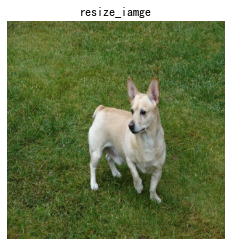

In [4]:
# 图像数据类型转换，并归一化到[0, 1]之间
float_img = tf.image.convert_image_dtype(img, tf.float32)
# 图像调整大小
resize_iamge = tf.image.resize(float_img, [300, 300])
show_pic(resize_iamge, 'resize_iamge')

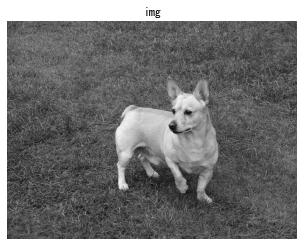

In [6]:
# 转换为灰度
gray_img = tf.image.rgb_to_grayscale(img)
# 将三通道压缩成单通道
gray_img = tf.squeeze(gray_img)
show_pic(gray_img,'img','gray')

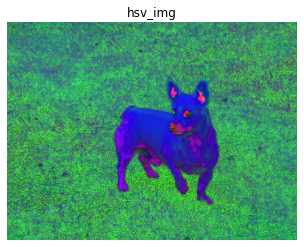

In [157]:
float_img = tf.image.convert_image_dtype(img, tf.float32)   #  图像数据类型转换，并归一化到[0,1]之间
hsv_img = tf.image.rgb_to_hsv(float_img)   # 对rgb图像进行hsv转换，输入的图像数据类型必须是half,float16,float32,float64)
show_pic(hsv_img,'hsv_img','hsv')

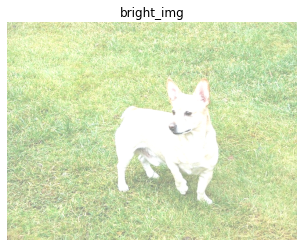

In [198]:
bright_img = tf.image.adjust_brightness(img, 0.5)   # 改变图像亮度
show_pic(bright_img,'bright_img')

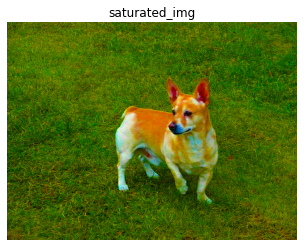

In [160]:
saturated_img= tf.image.adjust_saturation(img,8)   # 改变图像饱和度
show_pic(saturated_img,'saturated_img')

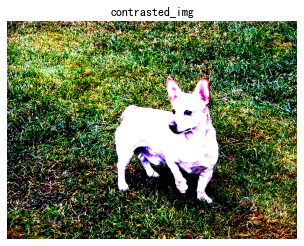

In [7]:
contrasted_img = tf.image.adjust_contrast(img, 5)   # 改变对比度
show_pic(contrasted_img,'contrasted_img')
encoded_image = tf.image.encode_jpeg(contrasted_img)   # 编码为tensor格式
#将编码后的图片保存到指定路径
with tf.io.gfile.GFile(os.getcwd()+'0001.jpg', 'wb') as file:  
    file.write(encoded_image.numpy())

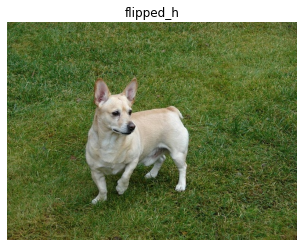

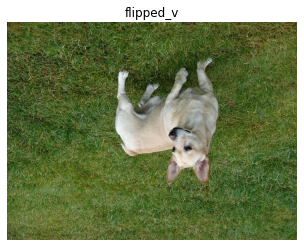

In [209]:
flipped_img1 = tf.image.flip_left_right(img)   # 水平翻转图像
show_pic(flipped_img1,'flipped_h')
flipped_img2 = tf.image.flip_up_down(img)   # 垂直翻转图像
show_pic(flipped_img2,'flipped_v')

(375, 500, 4)


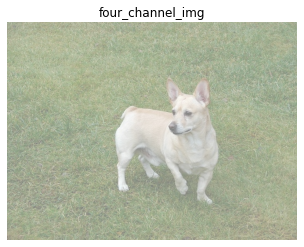

In [242]:
Alpha_channel = tf.fill([img.shape[0],img.shape[1],1],128.0)   # 创建一个元素全为128的张量
Alpha_channel = Alpha_channel/255.0   # 归一化后的元素值为0.5
four_channel_img = tf.concat([float_img,Alpha_channel],2)   # 将0.5倍透明通道合并到原图
print(four_channel_img.shape)
show_pic(four_channel_img,'four_channel_img')